In [1]:
#Project Scoping:
#Clean data. (fillna)
#Find rate of conservation status and plot the distribution of it.
#What were the most observed species at each park.
#Does any category of animal have a larger conservation rate than others?
#Do the observations of species correlate with the conservation status of those animals?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [7]:
#Create a new dataframe with the 'NaN' dropped to allow for easier use in finding conservation status.
new_species = species
new_species_conservation = new_species.dropna(axis=0, how='any').reset_index()
#Need to change the conservation status 'NaN' in order to properly use it in future calculations.
species.conservation_status = species.conservation_status.fillna('None')
#Create a merged dataframe to use data from both lists together.
merged = pd.merge(observation, species, how='inner')
merged.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,None


In [8]:
np.unique(merged.conservation_status)

array(['Endangered', 'In Recovery', 'None', 'Species of Concern',
       'Threatened'], dtype=object)

In [9]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [10]:
species.conservation_status.value_counts()

None                  5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [11]:
merged.conservation_status.value_counts(normalize=True) * 100

None                  96.566792
Species of Concern     2.855805
Endangered             0.312110
Threatened             0.171660
In Recovery            0.093633
Name: conservation_status, dtype: float64

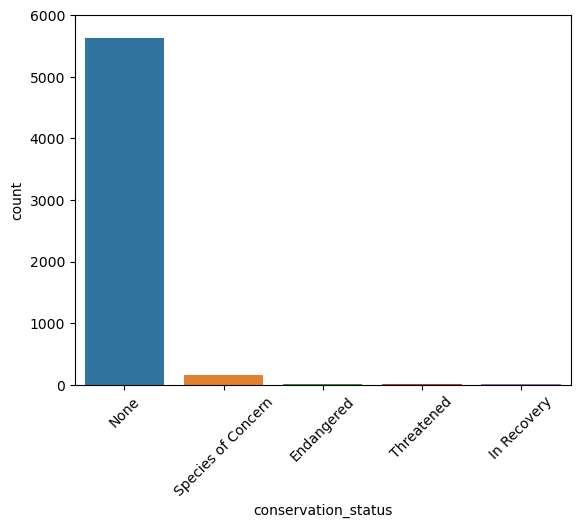

<Figure size 640x480 with 0 Axes>

In [12]:
#Here is a graph to show the conservation status of species.
#These graphs show that a majority of the species are not endangered and have no conservation status as a result.
sns.countplot(x='conservation_status', data=species)
plt.ylim(0, 6000)
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [13]:
new_species_conservation.head()

,index,category,scientific_name,common_names,conservation_status
0,7,Mammal,Canis latrans,Coyote,Species of Concern
1,8,Mammal,Canis lupus,Gray Wolf,Endangered
2,9,Mammal,Canis rufus,Red Wolf,Endangered
3,29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
4,30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [14]:
new_species_conservation.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [15]:
#Here is the percentage of each conservation type among species that are conserved.
new_species_conservation.conservation_status.value_counts(normalize=True) * 100

Species of Concern    84.293194
Endangered             8.376963
Threatened             5.235602
In Recovery            2.094241
Name: conservation_status, dtype: float64

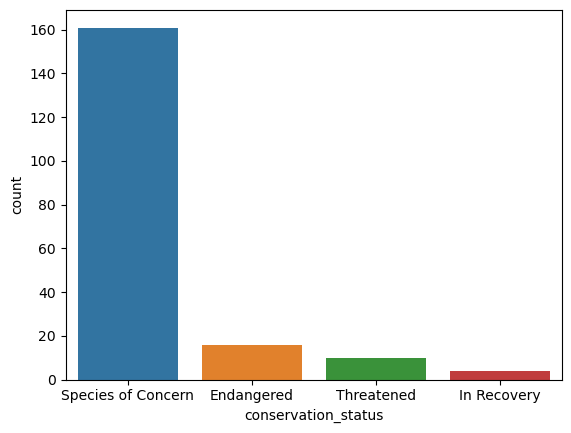

<Figure size 640x480 with 0 Axes>

In [16]:
#This graph shows the distribution of conservation status with just the species that in danger.
sns.countplot(x='conservation_status', data=new_species_conservation)
plt.show()
plt.clf()

In [17]:
#These are the average observations for each park in particular.
merged.observations.groupby(merged.park_name).mean()

park_name
Bryce National Park                     98.828184
Great Smoky Mountains National Park     74.104713
Yellowstone National Park              247.759207
Yosemite National Park                 148.166667
Name: observations, dtype: float64

In [18]:
#Here is the most observed species per park, how often they were observed, and what park they were observed at.
print(merged.scientific_name[merged.observations.groupby(merged.park_name).max()], merged.observations.groupby(merged.park_name).max())

176          Glyceria striata
147         Scirpus cyperinus
321    Pachysandra procumbens
223           Cirsium arvense
Name: scientific_name, dtype: object park_name
Bryce National Park                    176
Great Smoky Mountains National Park    147
Yellowstone National Park              321
Yosemite National Park                 223
Name: observations, dtype: int64


In [32]:
species_conservation_percentage = species.conservation_status.groupby(species.category).count()
species_conservation_percentage

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: conservation_status, dtype: int64

In [33]:
new_species_conservation_percentage = new_species_conservation.conservation_status.groupby(new_species_conservation.category).count()
new_species_conservation_percentage

category
Amphibian             7
Bird                 79
Fish                 11
Mammal               38
Nonvascular Plant     5
Reptile               5
Vascular Plant       46
Name: conservation_status, dtype: int64

In [21]:
#This shows that a larger portion of both birds and mammals observed are being watched or are in danger than any other category.
#Both vascular and nonvascular plants have an incredibly low percentage.
conservation_percentage = (new_species_conservation_percentage / species_conservation_percentage) * 100
conservation_percentage

category
Amphibian             8.750000
Bird                 15.163148
Fish                  8.661417
Mammal               17.757009
Nonvascular Plant     1.501502
Reptile               6.329114
Vascular Plant        1.029083
Name: conservation_status, dtype: float64

In [22]:
#There are a lot of 
merged.observations.groupby(merged.conservation_status).mean()

conservation_status
Endangered             43.912500
In Recovery            87.791667
None                  143.112718
Species of Concern    128.363388
Threatened             75.886364
Name: observations, dtype: float64